In [2]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\Lenovo\Desktop\Data Analysis\pah_wikp_combo.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df)

          Date           City           State  AreaType School  Fatalities  \
0    3/27/1990       Brooklyn        New York       NaN      C           0   
1    5/20/1990    Centerville       Tennessee  suburban     HS           1   
2    8/26/1990      Las Vegas          Nevada     urban     HS           1   
3    9/11/1990    San Antonio           Texas       NaN     HS           0   
4     1/8/1991     Richardson           Texas     urban     HS           0   
..         ...            ...             ...       ...    ...         ...   
781  3/22/2023         Dallas           Texas       NaN     HS           0   
782  3/22/2023      City Park        Colorado       NaN     HS           1   
783  3/25/2023     Orangeburg  South Carolina       NaN      C           0   
784  3/27/2023      Nashville       Tennessee       NaN     ES           7   
785  3/30/2023  Winston-Salem  North Carolina       NaN      C           0   

     Wounded Dupe Source                                       

Statewise Fatalities in School shooting anaylsis

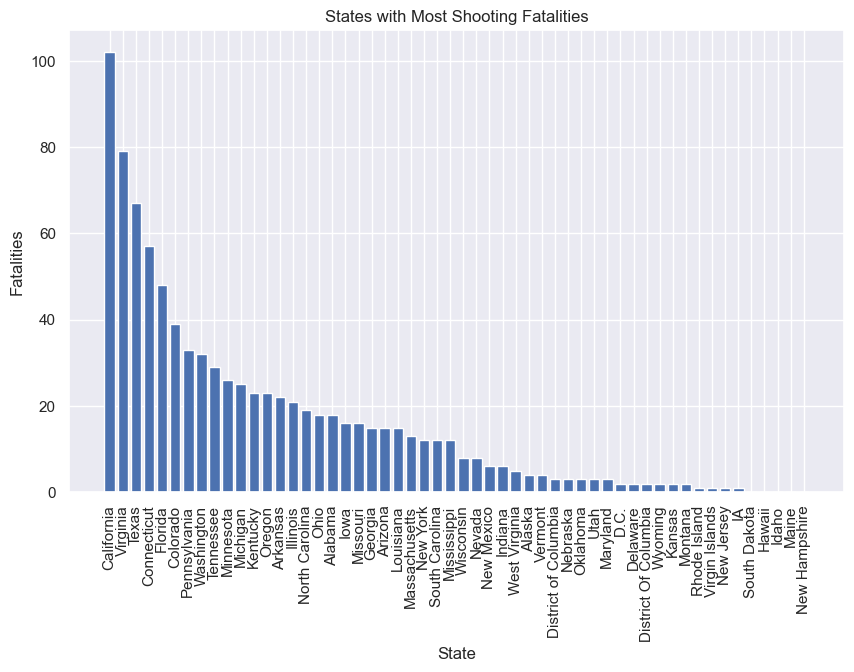

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = r'C:\Users\Lenovo\Desktop\Data Analysis\pah_wikp_combo.csv'
df = pd.read_csv(file_path)

# Group the data by state and calculate the total fatalities
state_fatalities = df.groupby('State')['Fatalities'].sum().reset_index()

# Sort the data by fatalities in descending order
state_fatalities = state_fatalities.sort_values('Fatalities', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(state_fatalities['State'], state_fatalities['Fatalities'])
plt.xlabel('State')
plt.ylabel('Fatalities')
plt.title('States with Most Shooting Fatalities')
plt.xticks(rotation=90)
plt.show()


In [39]:
import pandas as pd
import geopandas as gpd
import plotly.express as px

# Read the CSV file
file_path = r'C:\Users\Lenovo\Desktop\Data Analysis\pah_wikp_combo.csv'
df = pd.read_csv(file_path)

# Group the data by state and calculate the total fatalities
state_fatalities = df.groupby('State')['Fatalities'].sum().reset_index()



In [41]:
state_fatalities

,State,Fatalities
0,Alabama,18
1,Alaska,4
2,Arizona,15
3,Arkansas,22
4,California,102
5,Colorado,39
6,Connecticut,57
7,D.C.,2
8,Delaware,2
9,District Of Columbia,2


In [40]:
import pandas as pd
import plotly.express as px

# Create a DataFrame with state fatalities data
state_fatalities = pd.DataFrame({
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'D.C.', 'Delaware', 'District Of Columbia', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'IA', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'Fatalities': [18, 4, 15, 22, 102, 39, 57, 2, 2, 2, 3, 48, 15, 0, 1, 0, 21, 6, 16, 2, 23, 15, 0, 3, 13, 25, 26, 12, 16, 2, 3, 8, 0, 1, 6, 12, 19, 18, 3, 23, 33, 1, 12, 0, 29, 67, 3, 4, 1, 79, 32, 5, 8, 2]
})

# Create the US map plotly visualization
fig = px.choropleth_mapbox(state_fatalities,
                           geojson='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json',
                           locations='State',
                           featureidkey='properties.name',
                           color='Fatalities',
                           color_continuous_scale='Reds',
                           mapbox_style='carto-positron',
                           zoom=3,
                           center={'lat': 37.0902, 'lon': -95.7129},
                           opacity=0.8,
                           labels={'Fatalities': 'Fatalities'}
                           )

# Update layout
fig.update_layout(title='Fatalities by State',
                  margin={'r': 0, 't': 30, 'l': 0, 'b': 0})

# Show the plotly figure
fig.show()


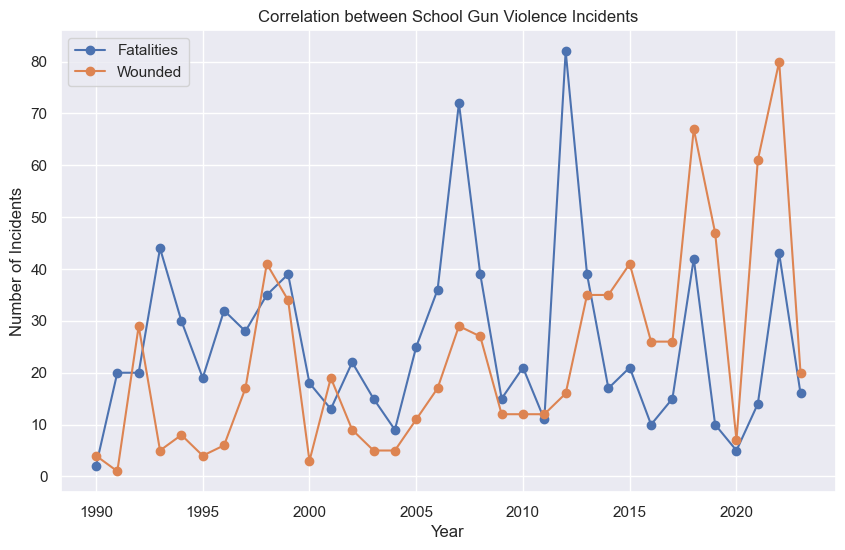

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
data_path = r'C:\Users\Lenovo\Desktop\Data Analysis\pah_wikp_combo.csv'
df = pd.read_csv(data_path)

# Select relevant columns for analysis
columns = ['Date', 'School', 'Fatalities', 'Wounded']
df = df[columns]

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by year and calculate the total incidents
df['Year'] = df['Date'].dt.year
df_grouped = df.groupby('Year').sum()

# Plot the correlation between year and total incidents
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['Fatalities'], marker='o', label='Fatalities')
plt.plot(df_grouped.index, df_grouped['Wounded'], marker='o', label='Wounded')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Correlation between School Gun Violence Incidents')
plt.legend()
plt.show()


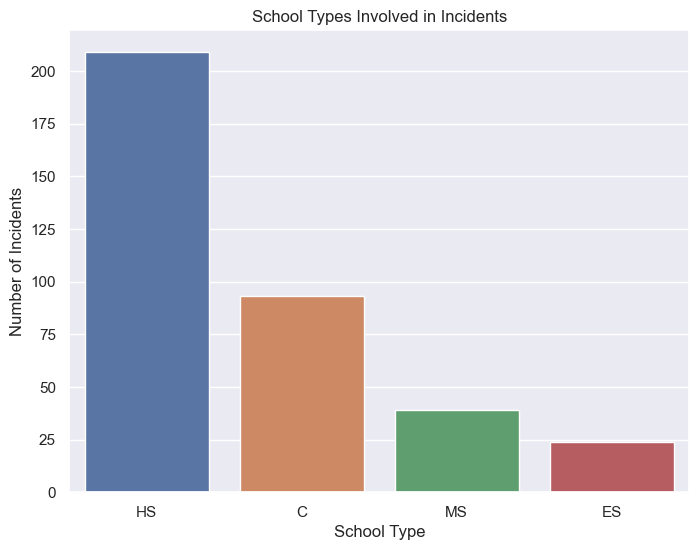

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
data_path = r'C:\Users\Lenovo\Desktop\Data Analysis\pah_wikp_combo.csv'
df = pd.read_csv(data_path)

# Clean the data: Remove unnecessary columns
df = df[['Date', 'School', 'Fatalities', 'Wounded']]

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Drop rows with missing values
df = df.dropna()

# Remove rows with zero fatalities and wounded
df = df[(df['Fatalities'] != 0) | (df['Wounded'] != 0)]

# Exclude rows where school type is "-"
df = df[df['School'] != "-"]


# Group the data by year and calculate the total incidents
df['Year'] = df['Date'].dt.year
df_grouped = df.groupby('Year').sum()

# Analyze the types of schools involved in incidents
school_counts = df['School'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=school_counts.index, y=school_counts.values)
plt.xlabel('School Type')
plt.ylabel('Number of Incidents')
plt.title('School Types Involved in Incidents')
plt.show()


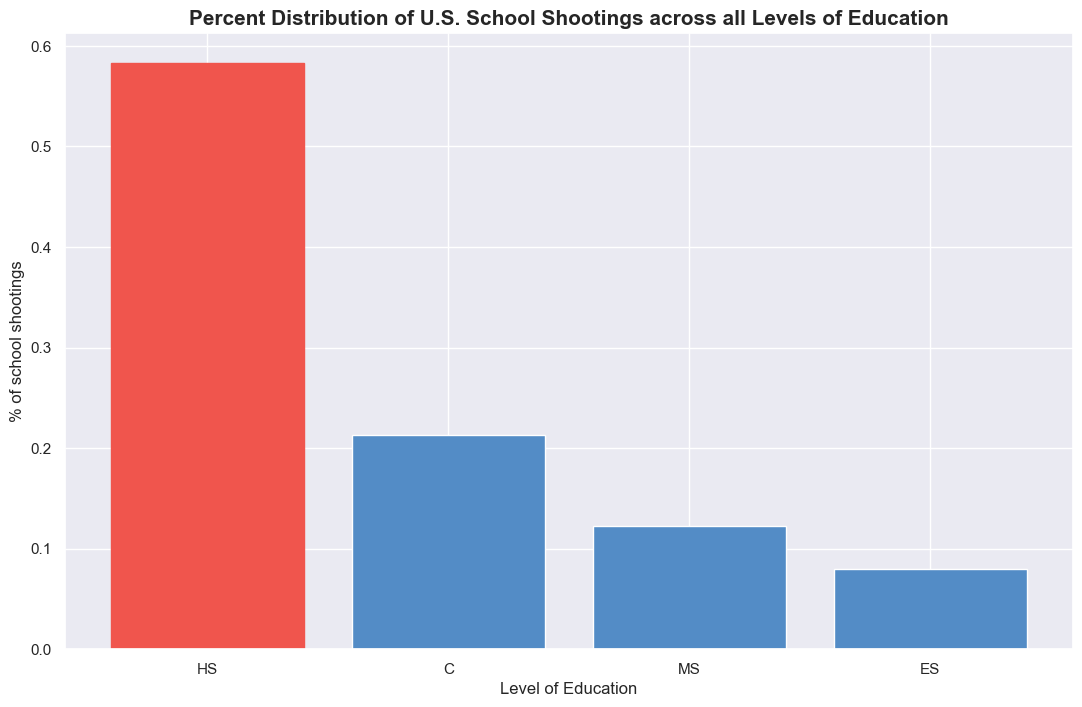

In [44]:
df_school = df[df['School'] != "-"]
df_school = df.groupby('School')['School'].count().rename("percentage").transform(lambda x: x/x.sum())
df_school = df_school.reset_index().sort_values(by='percentage',ascending=False)
df_school.head()


plt.figure(figsize=(13,8))

plt.title("Percent Distribution of U.S. School Shootings across all Levels of Education",fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel("Level of Education")
plt.ylabel("% of school shootings")

bars = plt.bar(df_school.School,df_school.percentage, color = '#538cc6')
bars[0].set_color('#f0554d')

plt.show()

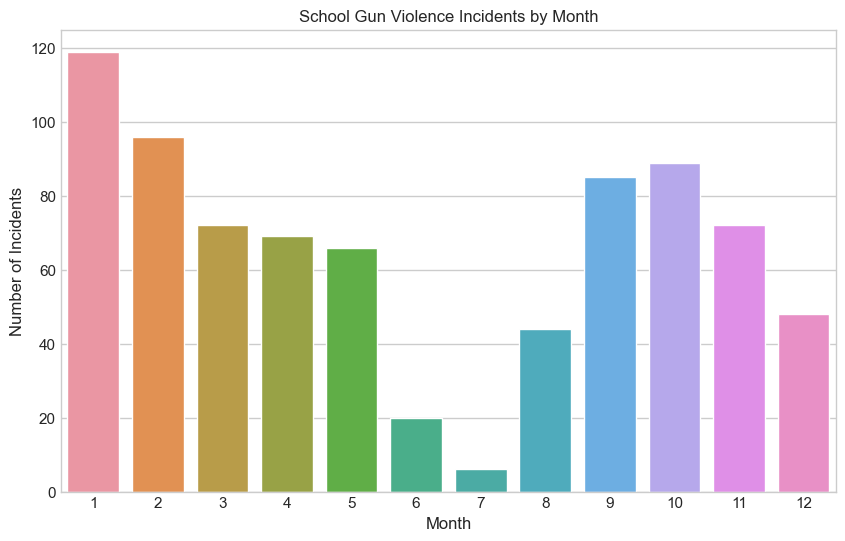

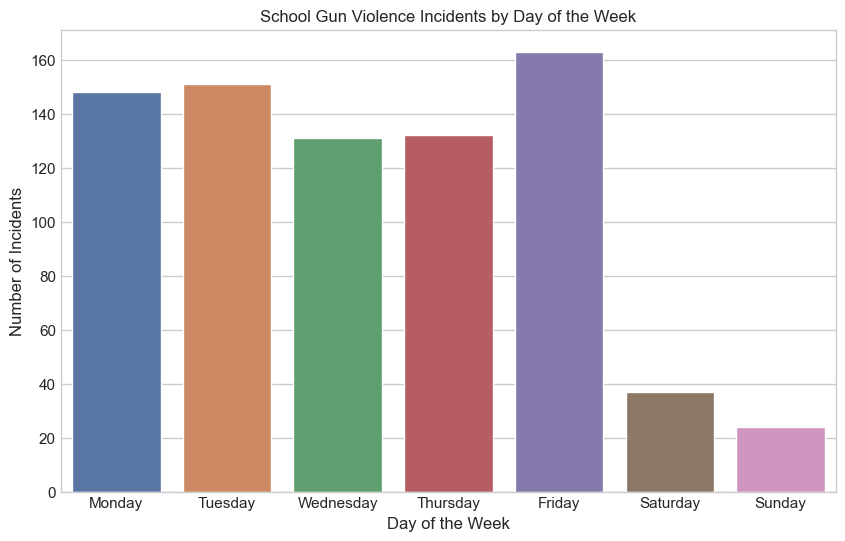

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
data_path =  r'C:\Users\Lenovo\Desktop\Data Analysis\pah_wikp_combo.csv'
df = pd.read_csv(data_path)

# Clean the data: Remove unnecessary columns
df = df[['Date', 'School', 'Fatalities', 'Wounded']]

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and day from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()

# Group the data by month and calculate the total incidents
df_grouped_by_month = df.groupby('Month').size()

# Group the data by day and calculate the total incidents
df_grouped_by_day = df.groupby('Day').size()

# Plot the temporal analysis by month
plt.figure(figsize=(10, 6))
sns.barplot(x=df_grouped_by_month.index, y=df_grouped_by_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('School Gun Violence Incidents by Month')
plt.show()

# Plot the temporal analysis by day
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.barplot(x=df_grouped_by_day.index, y=df_grouped_by_day.values, order=days_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.title('School Gun Violence Incidents by Day of the Week')
plt.show()


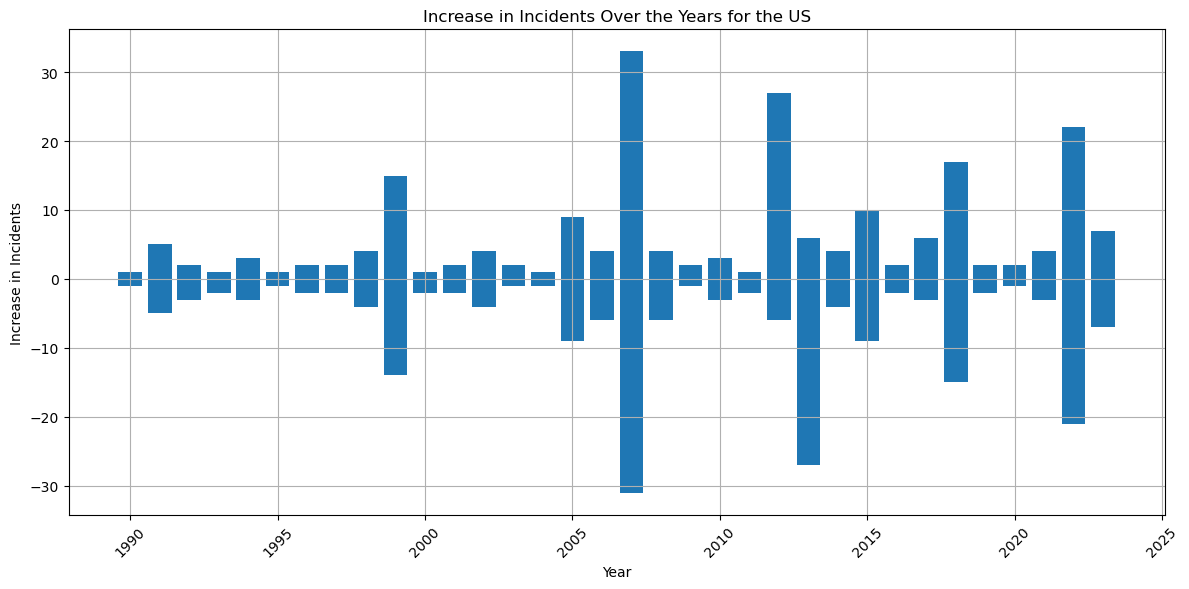

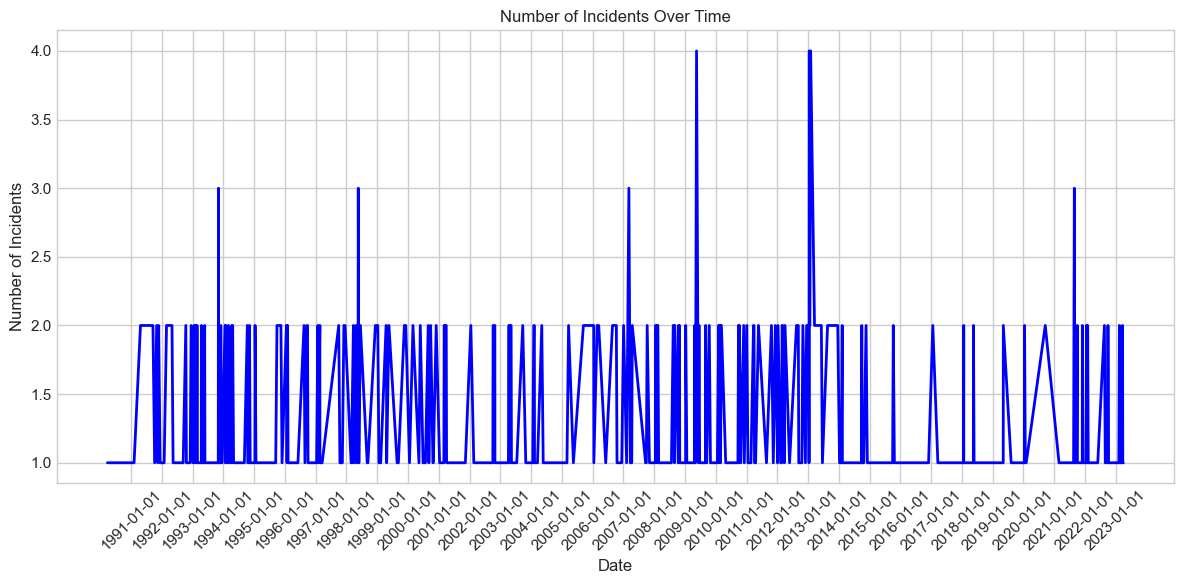

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = r'C:\Users\Lenovo\Desktop\Data Analysis\pah_wikp_combo.csv'
df = pd.read_csv(data)

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by date and count the number of incidents
df_grouped = df.groupby('Date').size()

# Set the figure size and style
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')

# Plot the number of incidents over time
plt.plot(df_grouped.index, df_grouped.values, color='blue', linewidth=2)

# Customize the axes labels and title
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents Over Time')

# Set the x-axis ticks to show every year
plt.xticks(pd.date_range(start=df_grouped.index.min(), end=df_grouped.index.max(), freq='YS'), rotation=45)

# Add grid lines and tighten the layout
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


Area type Visual


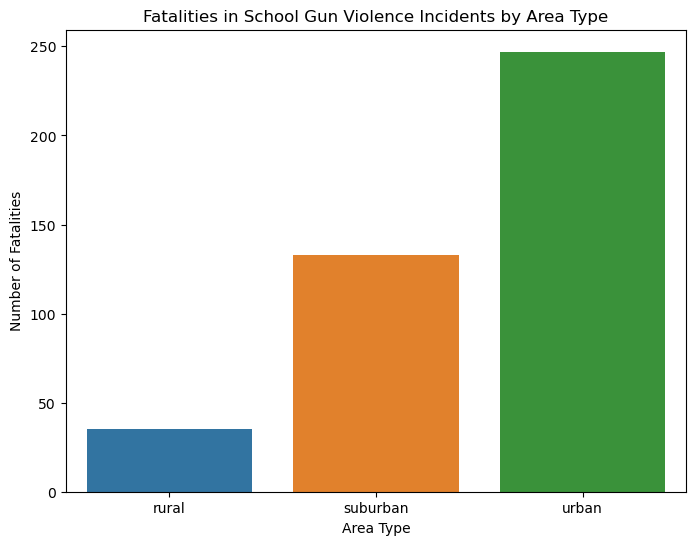

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
file_path = r'C:\Users\Lenovo\Desktop\Data Analysis\pah_wikp_combo.csv'
df = pd.read_csv(file_path)

# Clean the data: Remove unnecessary columns
columns = ['Date', 'AreaType', 'Fatalities']
df = df[columns].dropna()

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by area type and calculate the total fatalities
df_grouped = df.groupby('AreaType')['Fatalities'].sum().reset_index()

# Plot the analysis
plt.figure(figsize=(8, 6))
sns.barplot(x='AreaType', y='Fatalities', data=df_grouped)
plt.xlabel('Area Type')
plt.ylabel('Number of Fatalities')
plt.title('Fatalities in School Gun Violence Incidents by Area Type')
plt.show()


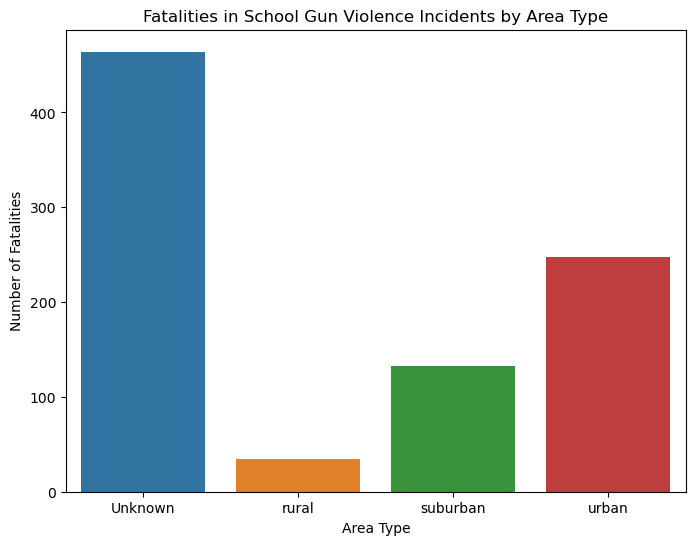

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
file_path = r'C:\Users\Lenovo\Desktop\Data Analysis\pah_wikp_combo.csv'
df = pd.read_csv(file_path)

# Select relevant columns for analysis
columns = ['AreaType', 'Fatalities']
df = df[columns]

# Fill missing values with 'Unknown'
df['AreaType'] = df['AreaType'].fillna('Unknown')

# Group the data by area type and calculate the total fatalities for each
df_grouped = df.groupby('AreaType')['Fatalities'].sum().reset_index()

# Plot the analysis using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='AreaType', y='Fatalities', data=df_grouped)
plt.xlabel('Area Type')
plt.ylabel('Number of Fatalities')
plt.title('Fatalities in School Gun Violence Incidents by Area Type')
plt.show()


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the data into a pandas DataFrame
data_path = r'C:\Users\Lenovo\Desktop\Data Analysis\pah_wikp_combo.csv'
df = pd.read_csv(data_path)

# Select the 'Desc' column
descriptions = df['Desc']

# Remove missing values in the 'Desc' column
descriptions = descriptions.dropna()

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the descriptions into a document-term matrix
dtm = vectorizer.fit_transform(descriptions)

# Get the vocabulary (features)
features = vectorizer.get_feature_names()

# Sum the occurrences of each feature across all descriptions
feature_counts = dtm.sum(axis=0).A1

# Create a dictionary of features and their corresponding counts
feature_count_dict = dict(zip(features, feature_counts))

# Sort the features based on their counts in descending order
sorted_features = sorted(feature_count_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most frequent features (words) and their counts
for feature, count in sorted_features[:10]:
    print(feature, count)


the 754
and 481
was 470
school 450
year 443
old 442
in 435
of 314
at 309
student 261


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
